Wrote /Users/corin44/Documents/myofitness/myo_datas/outputs/exercise_recommendations/figures/top10_exercises_annotated.png
Wrote markdown explanation to /Users/corin44/Documents/myofitness/myo_datas/outputs/exercise_recommendations/annotated_top_exercises.md


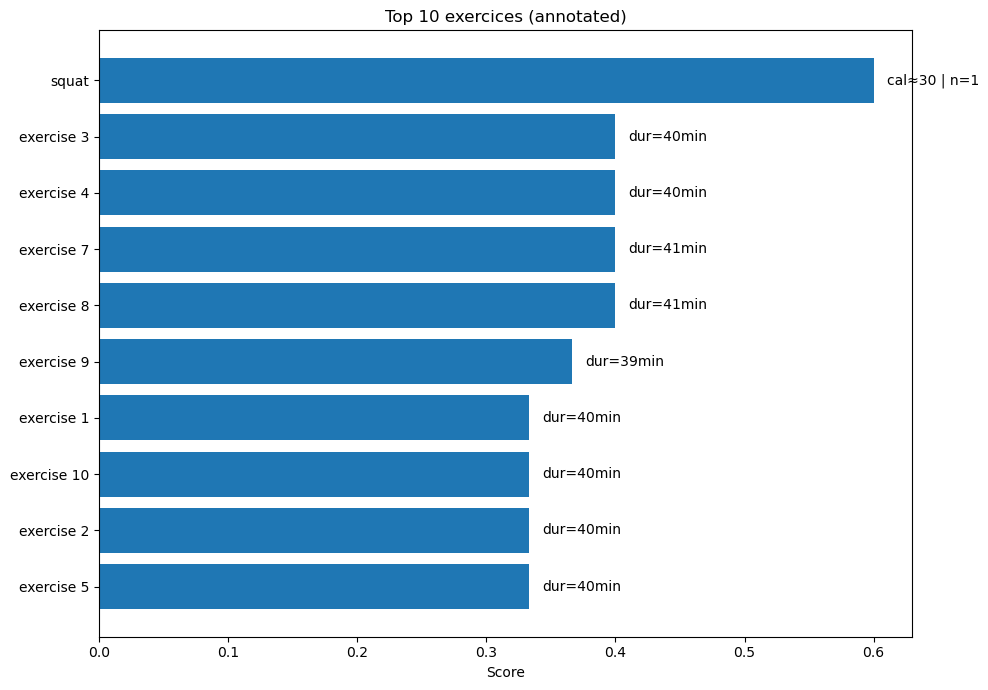

In [1]:
# Annotated Top Exercises

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path('''/Users/corin44/Documents/myofitness/myo_datas''')
OUT = BASE / 'outputs' / 'exercise_recommendations'
FIGS = OUT / 'figures'
FIGS.mkdir(parents=True, exist_ok=True)

# Load current top list and exercise stats
top = pd.read_csv(OUT / 'top_exercises_overall.csv')
stats = pd.read_csv(OUT / 'exercise_stats.csv') if (OUT / 'exercise_stats.csv').exists() else None

# Merge to annotate
if stats is not None:
    merged = top.merge(stats, left_on='exercise_key', right_on='exercise_key', how='left')
else:
    merged = top.copy()

# Annotate top 10
top10 = merged.head(10)

# Plot annotated bar chart
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(top10['exercise_key'][::-1], top10['score'][::-1], color='tab:blue')
ax.set_xlabel('Score')
ax.set_title('Top 10 exercices (annotated)')

# Add annotations: avg_calories / avg_duration / count if available
for i, row in enumerate(top10[::-1].itertuples()):
    label_parts = []
    if hasattr(row, 'avg_calories') and not pd.isna(row.avg_calories):
        label_parts.append(f"cal≈{row.avg_calories:.0f}")
    if hasattr(row, 'avg_duration') and not pd.isna(row.avg_duration):
        label_parts.append(f"dur={row.avg_duration:.0f}min")
    if hasattr(row, 'count') and not pd.isna(row.count):
        label_parts.append(f"n={int(row.count)}")
    label = ' | '.join(label_parts)
    ax.text(row.score + 0.01, i, label, va='center')

plt.tight_layout()
out_fig = FIGS / 'top10_exercises_annotated.png'
fig.savefig(out_fig)
print('Wrote', out_fig)

# Save a short markdown explanation next to the figure
md = OUT / 'annotated_top_exercises.md'
with open(md, 'w') as f:
    f.write('# Annotated Top Exercises\n\n')
    f.write('This notebook produces an annotated chart where each exercise shows its pipeline score and key stats (avg calories, avg duration, sample count).\n\n')
    f.write('Figure: figures/top10_exercises_annotated.png\n\n')
    f.write('Top 10 table:\n')
    top10.to_markdown(buf=f)

print('Wrote markdown explanation to', md)

